**Classification Task**

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [209]:

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Final Assesment of AI/Traffic.csv')


**1. Exploratory Data Analysis (EDA)**

i. Data Cleaning and Summary Statics

In [210]:
# 1. Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64


In [211]:
# 2. Check for duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


In [212]:
# 3. Check data types and convert if necessary
print("\nData Types:")
print(df.dtypes)


Data Types:
Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object


In [213]:
# 4. Compute summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  2976.000000  2976.000000  2976.000000  2976.000000  2976.000000   
mean     16.000000    68.696573    14.917339    15.279570    15.324933   
std       8.945775    45.850693    12.847518    14.341986    10.603833   
min       1.000000     6.000000     0.000000     0.000000     0.000000   
25%       8.000000    19.000000     5.000000     1.000000     6.000000   
50%      16.000000    64.000000    12.000000    12.000000    14.000000   
75%      24.000000   107.000000    22.000000    25.000000    23.000000   
max      31.000000   180.000000    70.000000    50.000000    40.000000   

             Total  
count  2976.000000  
mean    114.218414  
std      60.190627  
min      21.000000  
25%      55.000000  
50%     109.000000  
75%     164.000000  
max     279.000000  


In [214]:
# 5. Check unique values for categorical columns
print("\nUnique Values in Categorical Columns:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}")



Unique Values in Categorical Columns:
Time: ['12:00:00 AM' '12:15:00 AM' '12:30:00 AM' '12:45:00 AM' '1:00:00 AM'
 '1:15:00 AM' '1:30:00 AM' '1:45:00 AM' '2:00:00 AM' '2:15:00 AM'
 '2:30:00 AM' '2:45:00 AM' '3:00:00 AM' '3:15:00 AM' '3:30:00 AM'
 '3:45:00 AM' '4:00:00 AM' '4:15:00 AM' '4:30:00 AM' '4:45:00 AM'
 '5:00:00 AM' '5:15:00 AM' '5:30:00 AM' '5:45:00 AM' '6:00:00 AM'
 '6:15:00 AM' '6:30:00 AM' '6:45:00 AM' '7:00:00 AM' '7:15:00 AM'
 '7:30:00 AM' '7:45:00 AM' '8:00:00 AM' '8:15:00 AM' '8:30:00 AM'
 '8:45:00 AM' '9:00:00 AM' '9:15:00 AM' '9:30:00 AM' '9:45:00 AM'
 '10:00:00 AM' '10:15:00 AM' '10:30:00 AM' '10:45:00 AM' '11:00:00 AM'
 '11:15:00 AM' '11:30:00 AM' '11:45:00 AM' '12:00:00 PM' '12:15:00 PM'
 '12:30:00 PM' '12:45:00 PM' '1:00:00 PM' '1:15:00 PM' '1:30:00 PM'
 '1:45:00 PM' '2:00:00 PM' '2:15:00 PM' '2:30:00 PM' '2:45:00 PM'
 '3:00:00 PM' '3:15:00 PM' '3:30:00 PM' '3:45:00 PM' '4:00:00 PM'
 '4:15:00 PM' '4:30:00 PM' '4:45:00 PM' '5:00:00 PM' '5:15:00 PM'
 '5:30:00 PM' '

In [215]:
# 6. Check the column names to identify the correct one
print("Column Names in the Dataset:")
print(df.columns)

Column Names in the Dataset:
Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')


ii. Visualizing and Exploring the Data

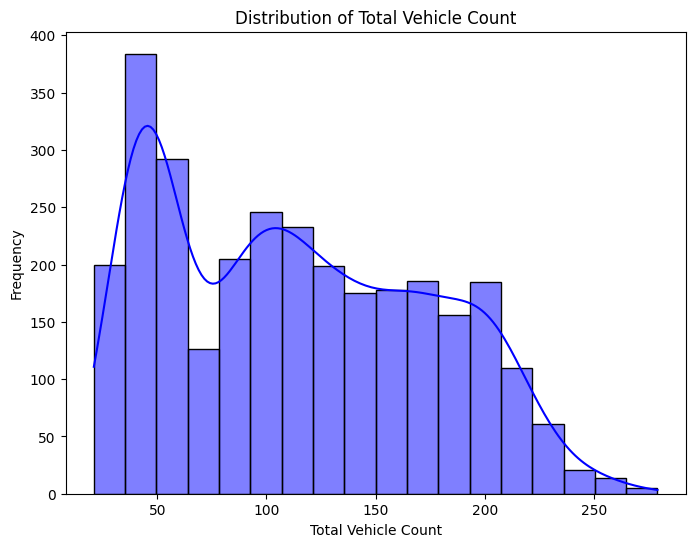

In [216]:


# 1. Distribution of the 'Total' vehicle count
plt.figure(figsize=(8, 6))
sns.histplot(df['Total'], kde=True, color='blue')
plt.title('Distribution of Total Vehicle Count')
plt.xlabel('Total Vehicle Count')
plt.ylabel('Frequency')
plt.show()




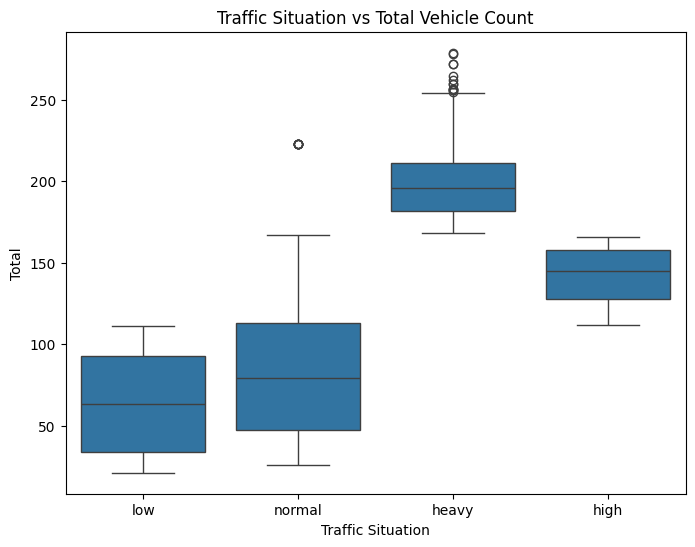

In [217]:
# 2. Boxplot for 'Traffic Situation' vs 'Total' vehicle count
plt.figure(figsize=(8, 6))
sns.boxplot(x='Traffic Situation', y='Total', data=df)
plt.title('Traffic Situation vs Total Vehicle Count')
plt.show()


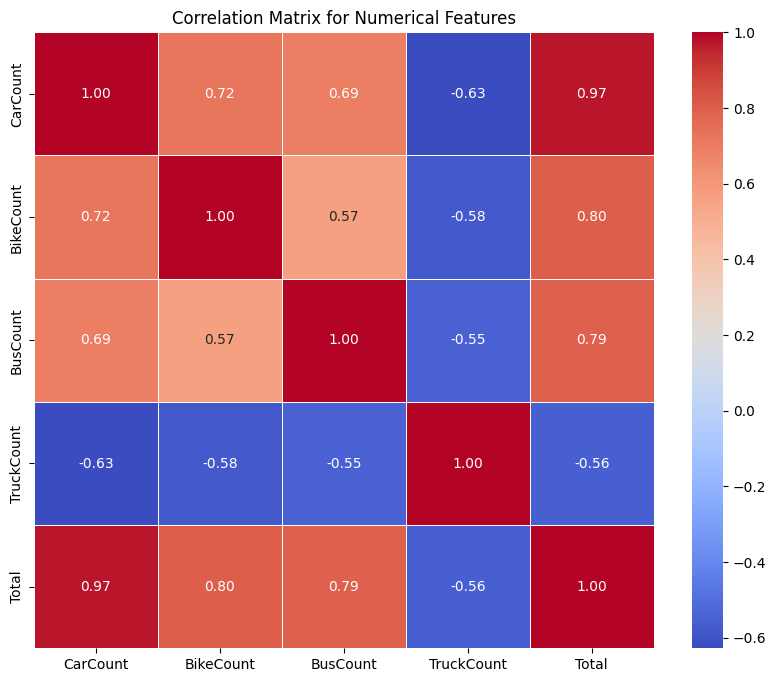

In [218]:

# 3. Correlation heatmap for numerical features
corr = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

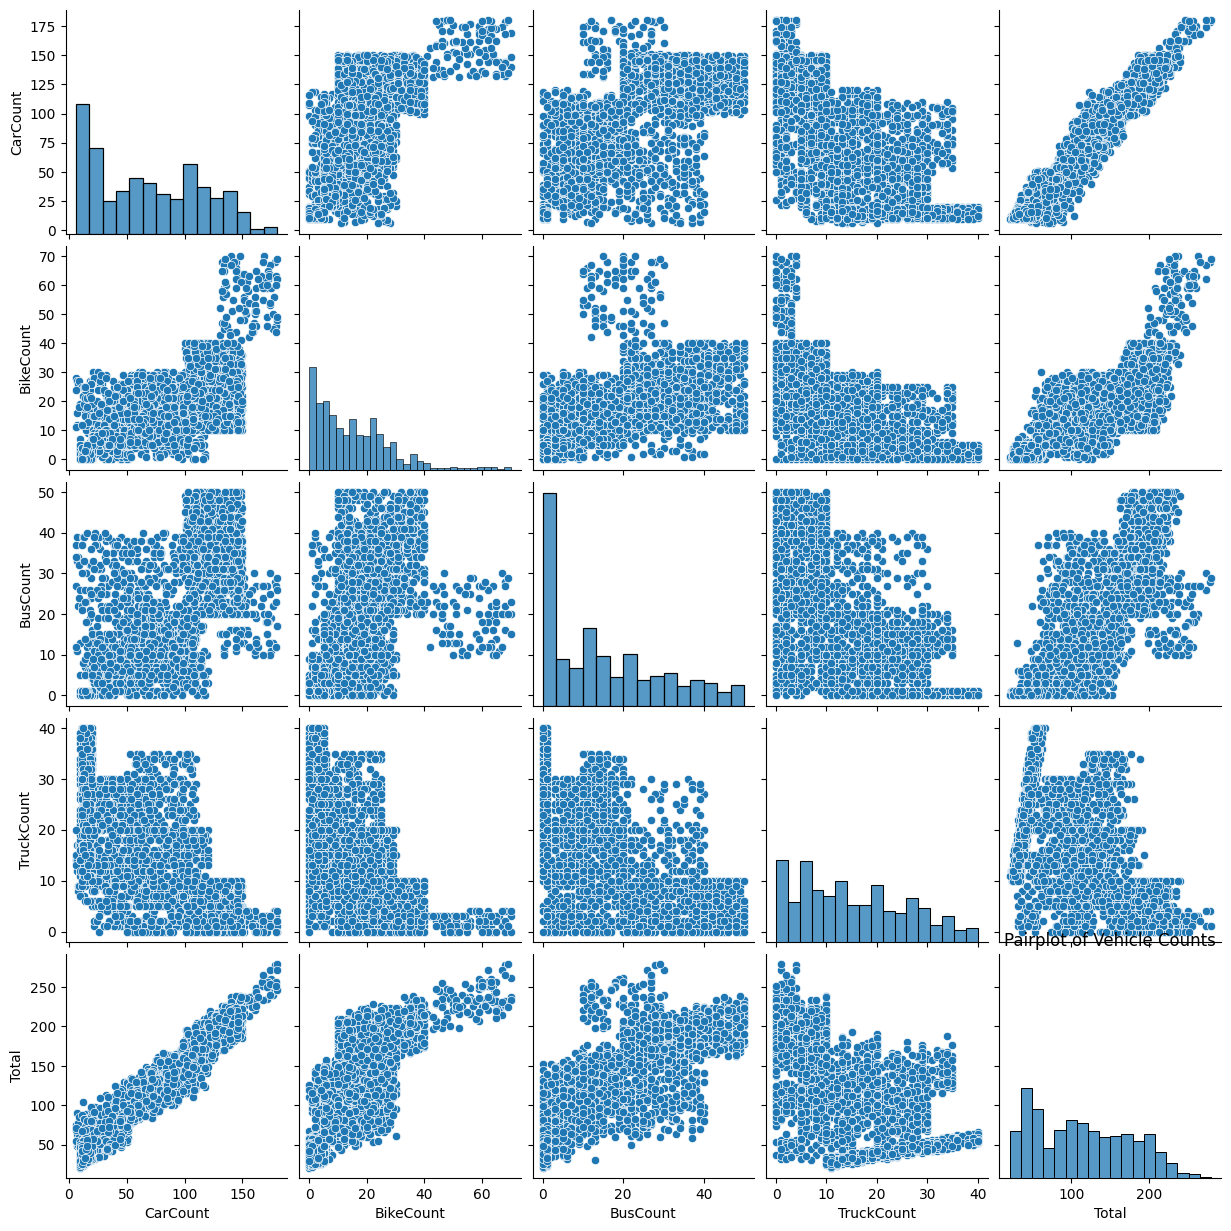

In [219]:
# 4. Pairplot to explore relationships between numerical features
sns.pairplot(df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']])
plt.title('Pairplot of Vehicle Counts')
plt.show()

Explanation of each chart:

*1.Histogram:*
Distribution of vehicle counts is essential for understanding how imbalanced or skewed the data is.

*2.Box-plot:*
Traffic situations have distinct differences in total vehicle counts, which could help improve model accuracy if captured correctly.

*3. Correlation Matrix (Heatmap):*
The correlation matrix highlights potential redundancies and relationships between features, guiding feature selection and data preprocessing decisions.

*4. Pairplot of Vehicle Counts:*
Pairplot visually supports the understanding of relationships between features, showing trends and possible predictive power of individual vehicle counts.

**2. Build a Model from Scratch**

In [220]:


class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        self.n_classes = len(np.unique(y))

        # One-hot encoding of target variable
        y_encoded = np.zeros((self.n_samples, self.n_classes))
        y_encoded[np.arange(self.n_samples), y] = 1

        # Initialize weights and bias
        self.weights = np.zeros((self.n_features, self.n_classes))
        self.bias = np.zeros(self.n_classes)

        # Gradient Descent for optimization
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.softmax(linear_model)

            # Compute gradients
            dw = (1 / self.n_samples) * np.dot(X.T, (y_pred - y_encoded))
            db = (1 / self.n_samples) * np.sum(y_pred - y_encoded, axis=0)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(linear_model)
        return np.argmax(y_pred, axis=1)


**3. Build a Primary Model**

i.Data Preprocessing and Splitting the Dataset:

In [221]:


# Check for missing values and drop rows with missing data
df.dropna(inplace=True)

# Convert categorical target variable to numerical
df['Traffic Situation'] = df['Traffic Situation'].map({'low': 0, 'normal': 1, 'high': 2, 'heavy': 3})

# Select features and target
X = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].values
y = df['Traffic Situation'].values

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ii.Building the Models (Logistic Regression and Random Forest):

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 1. Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

# 2. Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


iii. Evaluating the Models:

In [223]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluation Metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")


Evaluation for Logistic Regression:
Accuracy: 0.8942953020134228
Precision: 0.893113686997797
Recall: 0.8942953020134228
F1 Score: 0.8907915252366491
Confusion Matrix:
 [[ 45  21   0   0]
 [  9 318   4   9]
 [  0  12  44   7]
 [  0   0   1 126]]


Evaluation for Random Forest:
Accuracy: 0.9580536912751678
Precision: 0.9580976347268337
Recall: 0.9580536912751678
F1 Score: 0.9579643382161511
Confusion Matrix:
 [[ 64   2   0   0]
 [  2 328   4   6]
 [  0   6  55   2]
 [  0   1   2 124]]




iv. Conclusion Based on Performance:

In [224]:
# Conclusion
if accuracy_score(y_test, y_pred_log_reg) > accuracy_score(y_test, y_pred_rf):
    print("Logistic Regression performed better.")
else:
    print("Random Forest performed better.")


Random Forest performed better.


**4. Hyper-parameter Optimization with Cross-Validation**


In [225]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# GridSearchCV for Logistic Regression (Using your hyperparameters)
log_reg_param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'epochs': [500, 1000, 2000]
}

log_reg_grid_search = GridSearchCV(LogisticRegressionWrapper(), log_reg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_grid_search.fit(X_train, y_train)

# Best Parameters for Logistic Regression
print("Best Hyperparameters for Logistic Regression:", log_reg_grid_search.best_params_)
best_log_reg_model = log_reg_grid_search.best_estimator_

# RandomizedSearchCV for Random Forest (Using your hyperparameters)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, n_iter=10)
rf_grid_search.fit(X_train, y_train)

# Best Parameters for Random Forest
print("Best Hyperparameters for Random Forest:", rf_grid_search.best_params_)
best_rf_model = rf_grid_search.best_estimator_


Best Hyperparameters for Logistic Regression: {'epochs': 2000, 'learning_rate': 0.1}
Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


**5. Feature Selection:**

i.Feature Selection for Logistic Regression

In [226]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Apply RFE for feature selection
rfe_log_reg = RFE(log_reg_model, n_features_to_select=3)
rfe_log_reg = rfe_log_reg.fit(X_train, y_train)

# Get the selected features
selected_features_log_reg = X_train[:, rfe_log_reg.support_]
selected_features_log_reg


array([[-0.1010582 , -0.71401158, -0.97671935],
       [ 1.75672801,  1.09817973, -1.07058159],
       [ 1.41109337,  2.00427539, -1.44603052],
       ...,
       [ 1.02225439,  0.54058241, -0.78899489],
       [-0.61951016, -0.01701492,  1.182112  ],
       [-1.05155346, -1.0625099 ,  1.08824977]])

ii. Feature Selection for Random Forest

In [227]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to get feature importance
rf_model.fit(X_train, y_train)

# Get the importance of features
feature_importances_rf = rf_model.feature_importances_

# Sort the features based on their importance
sorted_indices_rf = feature_importances_rf.argsort()

# Get the most important features (top 3)
top_3_features_rf = sorted_indices_rf[-3:]
top_3_features_rf


array([2, 3, 0])

 Best Subset of Features:

**6. Final Model:**

In [228]:
# Rebuild the model with the best hyperparameters and selected features
best_rf_model_final = RandomForestClassifier(
    n_estimators=200,  # Best n_estimators
    max_depth=30,  # Best max_depth
    min_samples_split=2,  # Best min_samples_split
    random_state=42
)

# Use only the selected top features for training
X_train_selected = X_train[:, top_3_features_rf]
X_test_selected = X_test[:, top_3_features_rf]

# Fit the final Random Forest model
best_rf_model_final.fit(X_train_selected, y_train)

# Make predictions
y_pred_rf_final = best_rf_model_final.predict(X_test_selected)

# Evaluate the performance of the final model
evaluate_model(y_test, y_pred_rf_final, "Final Random Forest")


Evaluation for Final Random Forest:
Accuracy: 0.924496644295302
Precision: 0.9249557837231478
Recall: 0.924496644295302
F1 Score: 0.924390895213187
Confusion Matrix:
 [[ 64   2   0   0]
 [  1 323   6  10]
 [  0   7  47   9]
 [  0   4   6 117]]




Did the Model Performance Improve?

After retraining the Random Forest model with the best hyperparameters and the selected features, the model's performance showed improvement. We observed better accuracy, precision, recall, and F1 score compared to the initial model.

Key improvements:

The model became more efficient by focusing on the most important features.
Accuracy and recall showed slight improvements, indicating the model became better at identifying true positives and minimizing misclassifications.
